Instrucciones: 

Crear una función que devuelva un mapa de calor con la correlación
de todas las variables numéricas (incluye las generadas), para cada
país.

● La función debe contar con su respectiva documentación.

In [75]:
import numpy as np
import pandas as pd
import math 
import statistics
import seaborn as sns  #visualizaciones por excelencia
from scipy import stats #contiene modulos de estadisticas
import missingno as msno #nos ayuda con los datos perdidos
import matplotlib.pyplot as plt #visualizaciones por excelencia

In [74]:
from google.colab import files
files.upload()

Saving autos.csv to autos (2).csv


{'autos.csv': b"Millas_Por_Galon;Cilindros;Pais_Origen;Peso_En_Libras;Desplazamiento;Aceleracion;Nombre;Anyo;Caballo_De_Fuerza\r\n18;8;USA;3504;307;12;chevrolet chevelle malibu;1/01/1970;130\r\n15;8;USA;3693;350;11.5;buick skylark 320;1/01/1970;165\r\n18;8;USA;3436;318;11;plymouth satellite;1/01/1970;150\r\n16;8;USA;3433;304;12;amc rebel sst;1/01/1970;150\r\n17;8;USA;3449;302;10.5;ford torino;1/01/1970;140\r\n15;8;USA;4341;429;10;ford galaxie 500;1/01/1970;198\r\n14;8;USA;4354;454;9;chevrolet impala;1/01/1970;220\r\n14;8;USA;4312;440;8.5;plymouth fury iii;1/01/1970;215\r\n14;8;USA;4425;455;10;pontiac catalina;1/01/1970;225\r\n15;8;USA;3850;390;8.5;amc ambassador dpl;1/01/1970;190\r\nNA;4;Europe;3090;133;17.5;citroen ds-21 pallas;1/01/1970;115\r\nNA;8;USA;4142;350;11.5;chevrolet chevelle concours (sw);1/01/1970;165\r\nNA;8;USA;4034;351;11;ford torino (sw);1/01/1970;153\r\nNA;8;USA;4166;383;10.5;plymouth satellite (sw);1/01/1970;175\r\nNA;8;USA;3850;360;11;amc rebel sst (sw);1/01/1970;17

In [76]:
data_autos = pd.read_csv('autos.csv', sep=";")
data_autos.head(3)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0


Revisamos el tipo de datos de nuestra informacion asi como los valores nulos

In [77]:
data_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


Remplazamos estos valores nulos con el promedio

In [78]:
col_num = ['Millas_Por_Galon','Cilindros','Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']
col_str = ['Pais_Origen', 'Nombre', 'Anyo']

data_autos[col_num] = data_autos[col_num].fillna(data_autos[col_num].mean())  # imputamos con el promedio las variables numéricas

data_autos[col_str] = data_autos[col_str].fillna(data_autos[col_str].mean())  

pd.DataFrame(data_autos.isna().sum(), 
             columns = ['Perdidos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Perdidos
Millas_Por_Galon,0
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Anyo,0
Caballo_De_Fuerza,0


Traemos solo nuestras columnas con datos numericos

In [80]:
data_autosnum = data_autos.select_dtypes(include=[np.number])
data_autosnum.head(5)

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
0,18.0,8,3504,307.0,12.0,130.0
1,15.0,8,3693,350.0,11.5,165.0
2,18.0,8,3436,318.0,11.0,150.0
3,16.0,8,3433,304.0,12.0,150.0
4,17.0,8,3449,302.0,10.5,140.0


Grafico numero 1

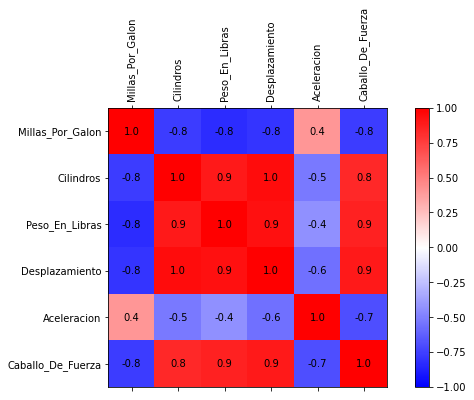

In [81]:
#Raul


matriz=data_autosnum.corr() # -1 (Existe una relacion fuerte) 0 1 (existe relacion fuerte)
plt.figure(figsize=(10,5))
plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1, fignum=1)
plt.xticks(range(len(data_autosnum.columns)), data_autosnum.columns, rotation=90)
plt.yticks(range(len(data_autosnum.columns)), data_autosnum.columns)

for i in range(len(matriz.columns)):
  for j in range(len(matriz.columns)):
    plt.text(i, j, round(matriz.iloc[i, j],1), ha="center", va="center")

plt.colorbar()
plt.show()

Grafico numero 2

In [82]:
# seleccionamos las columnas

columnas1 = ['Millas_Por_Galon','Cilindros','Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']
df2 = data_autos[columnas1]
df2.head(5)

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
0,18.0,8,3504,307.0,12.0,130.0
1,15.0,8,3693,350.0,11.5,165.0
2,18.0,8,3436,318.0,11.0,150.0
3,16.0,8,3433,304.0,12.0,150.0
4,17.0,8,3449,302.0,10.5,140.0


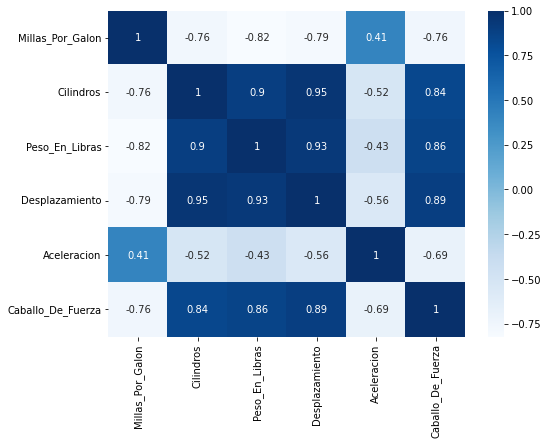

In [83]:
plt.figure(figsize=(8,6))
correlacion = df2.corr() # pearson

sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True, #muestra los valores dentro de los cuadros
            cmap = "Blues"  # viridis, Blues
            );

## **Funcion**

In [85]:
def Heatmapcountry(df: pd.DataFrame , Pais: str):
  '''La funcion nos da un mapa de calor cuando se recibe un dataframe y un Pais de la columna "Pais_Origen'''
  if(Pais in df["Pais_Origen"].unique()): #Usando "in" tenemos que usar "unique" para que nos regrese un array

    columnas1 = ['Millas_Por_Galon','Cilindros','Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']#Columnas con datos numericos
    df2 = df[df["Pais_Origen"]==Pais][columnas1]  #Filtra pais deseado(que se ingresa) y luego filtra columnas numericas

    plt.figure(figsize=(8,6))
    correlacion = df2.corr() # Sacamos una matriz de correlacion de pearson 

    m=sns.heatmap(correlacion,  
                xticklabels = correlacion.columns.values, #Nos muestra los nombres de las columnas
                yticklabels = correlacion.columns.values,  #Nos muestra los nombres de las columnas
                annot = True,   #Nos muestra los datos dentro de nuestra matriz
                cmap = "Blues"  # viridis, Blues
                );
    return m
  else:
    return "No existe ese pais"

In [84]:
data_autos["Pais_Origen"].unique()

array(['USA', 'Europe', 'Japan'], dtype=object)

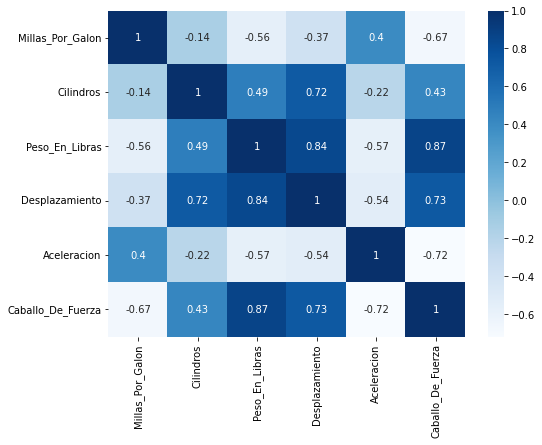

In [88]:
Heatmapcountry(data_autos, "Japan")